<a href="https://colab.research.google.com/github/hernansalinas/autogrades/blob/main/Laboratorios_Taller/Lab08_DerivacionEIntegracion_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



#1.Parte 1
1. En un cirtcuito con un voltaje de  $\varepsilon(t)$ y una inductancia de L, la primera ley de kirshhoff nos da la siguiente relación 


\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

donde r, es la resistencia del ciruito, i es la corriente. Suponga que medimos la corriente con varios valores de t y obtenemos:

t = 1.00, 1.01, 1.02, 1.03, 1.0

i = 3.10, 3.12, 3.14, 3.18, 3.24


donde t se mide en segundos, i se de en amper, la inductancia L es una constante de 0.98 herios, la resistencia es de 0.142 ohms. Aproxime el votaje  $\varepsilon(t)$ en los valores t=1.00, 1.01, 1.02, 1.03, 1.04 ,  para ello realice lo siguiente:


- Construya un data frame de pandas con los valores de tiempo y corriente 
- Emplee un metodo calcular la derivada numérica. 





In [202]:
#@title Librerias
import pandas as pd 
from scipy.interpolate import CubicSpline
from scipy.misc import derivative 

In [192]:
#@title Datos iniciales
R=0.142 #OHMS
L=0.98 #Henrios

In [193]:
url="https://raw.githubusercontent.com/hernansalinas/autogrades/main/Laboratorios_Taller/dataset/corrienteVstiempo"
data=pd.read_csv(url)

In [194]:
I=data['Corriente']
t=data['tiempo']

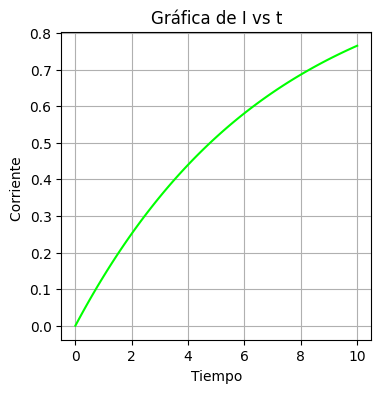

In [203]:
import matplotlib.pylab as plt
plt.figure(figsize=(4,4))
plt.plot(t,I,color='lime')
plt.xlabel('Tiempo')
plt.ylabel('Corriente ')
plt.title('Gráfica de I vs t')
plt.grid(True)

In [204]:
#calculando la derivadad numérica 
#realizar una interpolacion 
px=CubicSpline(t,I)
# se deriva a traves de misc.derivative
dpx=derivative(px,I,dx=0.01) 

<ipython-input-204-c70b4c2e4916>:5: DeprecationWarning: scipy.misc.derivative is deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. You may consider using findiff: https://github.com/maroba/findiff or numdifftools: https://github.com/pbrod/numdifftools
  dpx=derivative(px,I,dx=0.01)


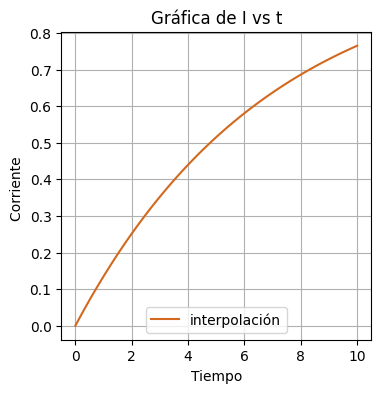

In [205]:
#visualizando la interpolación
import matplotlib.pylab as plt
plt.figure(figsize=(4,4))
plt.plot(t,px(t),color='chocolate',label='interpolación')
plt.xlabel('Tiempo')
plt.ylabel('Corriente ')
plt.title('Gráfica de I vs t')
plt.grid(True)
plt.legend(loc='lower center')


\begin{equation}
\varepsilon(t) = L\frac{\mathrm{d}i}{\mathrm{d}t} + Ri
\end{equation}

In [209]:
#Hallando el VOLTAJE 𝜀(𝑡)
def Voltaje(t):
  V=np.zeros(len(I))
  for u in range(len(I)):
    V[u]=L*dpx[u]+R*I[u]
  return V

In [210]:
Dt=pd.DataFrame({'Voltaje':Voltaje(t)})

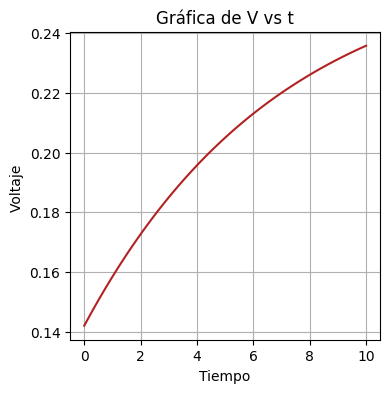

In [211]:
#Graficando el voltaje vs tiempo 
plt.figure(figsize=(4,4))
plt.plot(t,Voltaje(t),color='firebrick')
plt.xlabel('Tiempo')
plt.ylabel('Voltaje ')
plt.title('Gráfica de V vs t')
plt.grid(True)

In [212]:
#programaDerivada
#para ejecutar en el visual studio code
import pandas as pd 
from scipy.interpolate import CubicSpline
from scipy.misc import derivative 
import matplotlib.pylab as plt
import numpy as np


def read_file(path):
  df=pd.read_csv(path)
  return df

#De forma general (código del profe )
def read_filee(path,select):
  if (select=='csv'):
    df=pd.read_csv(path)
  elif (select=='xlsx'):
    df=pd.read_excel(path)
  else:
    print('Problema al leer')
    df=None
  return df

def derivada(df):
  I=df['Corriente']
  t=df['tiempo'] 
  #interpolando
  px=CubicSpline(t,I)
  #derivando 
  dpx=derivative(px,I,dx=0.01) 
  return dpx

def Voltaje(t):
  V=np.zeros(len(I))
  for u in range(len(I)):
    V[u]=L*dpx[u]+R*I[u]
  return V

def output(V):
  #voltaje.csv
  Dt=pd.DataFrame({'Voltaje':Voltaje(t)})
  Dt.to_csv('Voltaje.csv', index=False)
  #gráfico 
  plt.plot(t,Voltaje(t),color='firebrick')
  plt.xlabel('Tiempo')
  plt.ylabel('Voltaje ')
  plt.title('Gráfica de V vs t')
  plt.grid(True)
  return [Dt, plt]

#if  __name__== "__main__":

# Parte 2

1. **Escribir en código Markdown la expresión para calcular una integral con la regla del trapecio.**

Se utilizan n trapecios  y la fórmula es 

\begin{equation}
\int_{a}^{b} f(x) \cdot dx ≈ \frac{h}{2}[f(a)+2∑_{i=1}^{n-1}f(x_i)+f(b)]
\end{equation}


donde $h$ es el ancho de cada subintervalo
 $$h=\frac{b-a}{n}$$ y $$x_i =a+ih$$ 
son los puntos donde se evalua la función 


2. **Escribir en código Markdown la expresión para calcular una integral con la regla del simpson**

En este método de integración numérica se aproxima la función de polinomios de segundo grado en cada subintervalo.

\begin{equation}
\int_{a}^{b} f(x) \cdot dx ≈ \frac{h}{3}[f(a)+4f(x_1)+2f(x_2)+4f(x_3)+...+2f(x_{n-2})+4f(x_{n-1})+f(b)]
\end{equation}


donde $h$ es el ancho de cada subintervalo
 $$h=\frac{b-a}{n}$$ y $$x_i =a+ih$$ 
son los puntos donde se evalua la función 

Nota:Este método es más preciso que el anterior .

**3. Escribir en código Markdown la expresión para calcular una integral con el metodo de cuadratura.**

$$\int_{a}^{b} f(x) dx \approx \sum_{i=1}^{n} w_i f(x_i)$$

donde $x_i$ son los nodos de la cuadratura, $w_i$ son los pesos correspondientes y $n$ es el número de nodos.
En este método se utilizan los polinomios de Legendre para hallar los nodos y los pesos, lo que  minimiza el error de aproximación en la integración.

# **4. Calcular una aproximación con el metodo 1,2,3 de las siguientes integrales**

<!-- 
 $$
 \int_0^\pi e^{1-\sqrt{x}}\, dx
 $$  -->


- $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$

- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


- 

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy
 $$

<!-- 
- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$ -->

<!-- 
- 
$$
 \int_{e}^{2e} \frac{1}{\ln x} \, dx
 $$ -->


garantizando  que el error sea menor a $\varepsilon=1E-5$.  

**Método del trapecio**


- $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$


In [265]:
#@title Librerias
from scipy.integrate import trapz
from scipy.integrate import simpson
from scipy.integrate import quad
from scipy.optimize import optimize
from scipy.integrate import dblquad
import matplotlib.pylab as plt
import numpy as np 
import sympy as sp
from scipy.special import ellipk, ellipe

In [266]:
f1=lambda x:1/(np.sqrt(np.tan(x)))

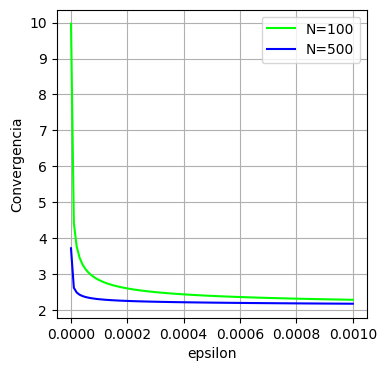

In [267]:
from scipy import integrate
import numpy as np
import matplotlib.pylab as plt
# Se realiza una función con el objetivo de observar el comportamiento de la funció
#para diferentes N y epsilon
@np.vectorize
def integral_trap(N, epsilon):
  x = np.linspace(0+epsilon, np.pi/2-epsilon, N)  
  area = integrate.trapz(f1(x), x)
  return area

ep=np.linspace(1E-6, 1E-3, 100)
t1=integral_trap(100, ep)
t2=integral_trap(500, ep)
plt.figure(figsize=(4, 4))
plt.plot(ep, t1, label="N=100",color='lime')
plt.plot(ep, t2, label="N=500",color='blue')
plt.xlabel("epsilon")
plt.ylabel("Convergencia")
plt.legend()
plt.grid()

In [268]:
epsilon=1e-09
#Se toma el valor para N cuya integral da aproximada a lo esperado (wolfram alpha)
N=100000000
x_=np.linspace(0+epsilon,np.pi/2-epsilon,N) 
y=f1(x_)
intT=trapz(y,x_,dx=0.000001)
print(f"El valor de la integral con el método del trapecio es {round(intT,3)} ")

El valor de la integral con el método del trapecio es 2.221 



**Encontrando N asociado al error menor o igual a  𝜀=1𝐸−5  con el método del trapecio**

- $$
 \int_0^{1} \log(1+x^2) dx
 $$


In [269]:
func=lambda x: np.log(1+x**2)

In [270]:
Error=1e-5
x=sp.symbols('x')
funcion1=lambda x: sp.log(1+x**2)
#se necesita encontrar el maximo 
derv=sp.diff(funcion1(x),x,2)
f=sp.lambdify(x,-derv,'numpy')
Dmax=optimize.fmin_powell(f,0.1,ftol=1e-7)

Optimization terminated successfully.
         Current function value: -2.000000
         Iterations: 2
         Function evaluations: 29


<ipython-input-270-92e1bb40a0d7>:7: DeprecationWarning: Please use `fmin_powell` from the `scipy.optimize` namespace, the `scipy.optimize.optimize` namespace is deprecated.
  Dmax=optimize.fmin_powell(f,0.1,ftol=1e-7)


In [271]:
def trapz_n(a, b, error):
    h = np.sqrt(6 * error)
    N = (b - a) / h
    return "El número de intervalos para el error solicitado es: %.0f" % np.ceil(N), "El tamaño de cada paso es: %.5f" % h

# Aplicando 
a = 0
b = 1
error = 1e-5
trapz_n(a, b, error)

('El número de intervalos para el error solicitado es: 130',
 'El tamaño de cada paso es: 0.00775')

In [272]:
#Calculando la integral con 
N=130
x__=np.linspace(0,1,N)
y_=func(x__)
val=trapz(y_,x__)
print(f"El valor de la integral con el método del trapecio con {N} intervaloes es {round(val,4)} ")

El valor de la integral con el método del trapecio con 130 intervaloes es 0.2639 


**Método de simpson**. 
- $$
 \int_0^{\pi/2} \frac{1}{\sqrt{\tan x}}\, dx
 $$




In [273]:
N=100000000
x_=np.linspace(0+epsilon,np.pi/2-epsilon,N) 
y=f1(x_)
intS=simpson(y,x_,dx=0.000001)
print(f"El valor de la integral con el método de simpson  es {round(intS,3)} ")

El valor de la integral con el método de simpson  es 2.221 


**Encontrando N asociado al error menor o igual a  𝜀=1𝐸−5  con el método de simpson**

$E_s = -\frac{(b-a)^5}{180n^4}f^{(4)}(\xi)$

donde $E_s$ es el error en la aproximación de la integral, $n$ es el número de subintervalos, $f^{(4)}$ es la cuarta derivada de la función integranda $f(x)$, y $\xi$ es un punto en el intervalo $[a,b]$ en este caso usamos el máximo.

In [274]:
x_=np.linspace(0+epsilon,np.pi/2-epsilon,N) 
y=f1(x_)
Error=1e-5
x=sp.symbols('x')
f1=lambda x:1/(sp.sqrt(sp.tan(x)))
#se necesita encontrar el maximo 
derv=sp.diff(f1(x),x,4)
f=sp.lambdify(x,-derv,'numpy')
Dmax=optimize.fmin_powell(f,0.1,ftol=1e-7)

<ipython-input-274-2b1f2b474fad>:9: DeprecationWarning: Please use `fmin_powell` from the `scipy.optimize` namespace, the `scipy.optimize.optimize` namespace is deprecated.
  Dmax=optimize.fmin_powell(f,0.1,ftol=1e-7)
<lambdifygenerated-9>:2: RuntimeWarning: invalid value encountered in power
  return -((1/16)*tan(x)**2 + 1/16)*(105*(tan(x)**2 + 1)**3/tan(x)**(9/2) - 264*(tan(x)**2 + 1)**2/tan(x)**(5/2) + 208*(tan(x)**2 + 1)/sqrt(tan(x)) - 64*tan(x)**(3/2))
<lambdifygenerated-9>:2: RuntimeWarning: invalid value encountered in sqrt
  return -((1/16)*tan(x)**2 + 1/16)*(105*(tan(x)**2 + 1)**3/tan(x)**(9/2) - 264*(tan(x)**2 + 1)**2/tan(x)**(5/2) + 208*(tan(x)**2 + 1)/sqrt(tan(x)) - 64*tan(x)**(3/2))
<ipython-input-274-2b1f2b474fad>:9: RuntimeWarning: NaN result encountered.
  Dmax=optimize.fmin_powell(f,0.1,ftol=1e-7)


In [275]:
def simpson_n(a, b):
    n = (((b - a)**5 *abs(Dmax)) / (180 * abs(Error))) ** (1/4)
    return "El número mínimo de subintervalos es:", np.ceil(n)[0]

In [276]:
simpson_n(epsilon,np.pi/2-epsilon)

('El número mínimo de subintervalos es:', 8.0)

In [277]:
#si aplicamos esto 
f1=lambda x:1/(np.sqrt(np.tan(x)))
N=8
x_=np.linspace(0+epsilon,np.pi/2-epsilon,N) 
y=f1(x_)
intS=simpson(y,x_,dx=0.000001)
print(f"El valor de la integral con el método de simpson  es {round(intS,3)} ")

El valor de la integral con el método de simpson  es 2958.278 


Este valor **No** es el esperado lo cual se debe a que la función tiene asintotas.

**Método de Cuadratura** 

In [278]:
#retorna el valor y el error absoluto 
intQ=quad(f1,min(x_),max(x_))
print(f"El valor de la integral con el método de simpson  es {np.round(intQ[0],3)} y su error absoluto es {intQ[1]} ")

El valor de la integral con el método de simpson  es 2.221 y su error absoluto es 1.1013265854842302e-09 



- $$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$


**Método del trapecio**

In [279]:
from scipy.integrate import trapz
f2=lambda x: 1/(1+x**2)
#Se necesita redefinir el inf ,el analisis se llevará a cabo con la gráfica 
#El objetivo es buscar un resultado aproximado al dado por quad,que es π
x=np.linspace(-200000.99999999,200000.9999999,10000000)
y=f2(x)
intt=trapz(y,x,dx=0.0001)
print(f"El valor de la integral con el método del trapecio  es {round(intt,4)}")

El valor de la integral con el método del trapecio  es 3.1416


**Encontrando N asociado al error menor o igual a  𝜀=1𝐸−5  con el método del trapecio**

In [280]:
def trapz_n(a, b, error):
    h = np.sqrt(6 * error)
    N = (b - a) / h
    return "El número de intervalos para el error solicitado es: %.0f" % np.ceil(N), "El tamaño de cada paso es: %.5f" % h
trapz_n(min(x),max(x),Error)

('El número de intervalos para el error solicitado es: 51640037',
 'El tamaño de cada paso es: 0.00775')

In [281]:
#Aplicando esto 
N=51640037
x=np.linspace(-200000.99999999,200000.9999999,N)
y=f2(x)
intt=trapz(y,x,dx=0.0001)
print(f"El valor de la integral con el método de simpson  es {intt}")

El valor de la integral con el método de simpson  es 3.1415826536397833


**Método de Simpson**

In [282]:
Ints=simpson(y,x,dx=0.0001)
print(f"El valor de la integral con el método de simpson  es {round(Ints,4)}")

El valor de la integral con el método de simpson  es 3.1416


**Encontrando N asociado al error menor o igual a  𝜀=1𝐸−5  con el método de simpson**

In [283]:
Error=1e-5
x=sp.symbols('x')
f2=lambda x: 1/(1+x**2)

#se necesita encontrar el maximo 
derv=sp.diff(f2(x),x,4)
f=sp.lambdify(x,-derv,'numpy')
Dmax=optimize.fmin_powell(f,1,ftol=1e-10)

x=np.linspace(-200000.99999999,200000.9999999,N)
#
def simpson_n(a, b):
    n = (((b - a)**5 *abs(Dmax)) / (180 * abs(Error))) ** (1/4)
    return "El número mínimo de subintervalos es:", np.ceil(n)[0]

simpson_n(-200000.99999999,200000.9999999)

Optimization terminated successfully.
         Current function value: -0.375000
         Iterations: 2
         Function evaluations: 44


<ipython-input-283-a6e7c57ef6c9>:8: DeprecationWarning: Please use `fmin_powell` from the `scipy.optimize` namespace, the `scipy.optimize.optimize` namespace is deprecated.
  Dmax=optimize.fmin_powell(f,1,ftol=1e-10)


('El número mínimo de subintervalos es:', 56027306.0)

In [284]:
#si aplicamos esto 
N=56027306
x=np.linspace(-200000.99999999,200000.9999999,N)
y=f2(x)
intt=simpson(y,x,dx=0.0001)
print(f"El valor de la integral con el método de simpson  es {intt}")

El valor de la integral con el método de simpson  es 3.1415826536397984


**Método de Cuadratura**

In [285]:
Intq=quad(f2,-np.inf,np.inf)
print(f"El valor de la integral con el método de simpson  es {round(Intq[0],4)} y su Error absoluto es {Intq[1]} ")

El valor de la integral con el método de simpson  es 3.1416 y su Error absoluto es 5.155583041103855e-10 



- 

$$
 \int_{0}^{\pi/4} \int_{\sin x}^{\cos x} (2y\sin x +\cos^2 x)\, dxdy $$

<!-- 
- 
$$
 \int_{-\infty}^{\infty} \frac{1}{1+x^2} \, dx
 $$ -->

<!-- 
- 
$$
 \int_{e}^{2e} \frac{1}{\ln x} \, dx
 $$ -->



In [286]:
#Encontrando el valor de manera más directa para comparar con los que obtendré con los otros métodos 
funcion = lambda x,y : 2*y*np.sin(x) + np.cos(x)**2
integral, error = dblquad(funcion, 0, np.pi/4, lambda x: np.sin(x), lambda x: np.cos(x))

print("El valor de la integral con dblquad es",integral)

El valor de la integral con dblquad es 0.4041197515454243


**Método del trapecio**

In [287]:
# El dominio de integración para x 
x = np.linspace(0, np.pi/4, 100)
def intDouble_trapez(funcion):
    x = np.linspace(0, np.pi/4, 100)
    y = np.zeros(len(x))
    for i in range(len(x)):
        integrando_y = lambda y: funcion(x[i], y)
        y[i] = trapz([integrando_y(a) for a in np.linspace(np.sin(x[i]), np.cos(x[i]), 100)], np.linspace(np.sin(x[i]), np.cos(x[i]), 100))
    resultado = trapz(y, x)
    return f'El valor de la integral por el método del trapecio es  {resultado}'


In [288]:
intDouble_trapez(funcion)

'El valor de la integral por el método del trapecio es  0.5118335093392186'

In [289]:
#Usando los métodos quad y trapz
def intDouble(funcion,x):
  y = np.zeros(len(x))
  for i in range(len(x)): 
     integrando_y = lambda y: funcion(x[i], y)
     resultado_y, error = quad(integrando_y, np.sin(x[i]), np.cos(x[i]))
     y[i]=resultado_y
     valor=trapz(y,x)
  return f'El valor de la integral es de {valor}'

In [290]:
intDouble(funcion,x)

'El valor de la integral es de 0.5118335093392186'

**Encontrando N asociado al error menor o igual a  𝜀=1𝐸−5  con el método del trapecio**

In [291]:
def trapz_n(a, b, error):
    h = np.sqrt(6 * error)
    N = (b - a) / h
    return "El número de intervalos para el error solicitado es: %.0f" % np.ceil(N), "El tamaño de cada paso es: %.5f" % h
trapz_n(min(x),max(x),Error)

('El número de intervalos para el error solicitado es: 102',
 'El tamaño de cada paso es: 0.00775')

**Método de Simpson**


In [292]:
def intDouble_Simp(funcion):
    x = np.linspace(0, np.pi/4, 100)
    y = np.zeros(len(x))
    for i in range(len(x)):
        integrando_y = lambda y: funcion(x[i], y)
        y[i] = simpson([integrando_y(a) for a in np.linspace(np.sin(x[i]), np.cos(x[i]), 100)], np.linspace(np.sin(x[i]), np.cos(x[i]), 100))
    resultado = simpson(y, x)
    return f'El valor de la integral por el método de simpson es  {resultado}'

In [293]:
intDouble_Simp(funcion)

'El valor de la integral por el método de simpson es  0.5118445718953843'

**Método de Cuadratura**

In [294]:
def integrando_x(x):
    integrando_y = lambda y: funcion(x, y)
    resultado_y, error = quad(integrando_y, np.sin(x), np.cos(x))
    return resultado_y

resultado_x, eError = quad(integrando_x, 0, np.pi/4)

print(f"La integral con el método de Cuadratura es {round(resultado_x,4)} y su error es {eError}")


La integral con el método de Cuadratura es 0.5118 y su error es 5.682616991530416e-15


# 5. The next  problems are examples of how elliptic integrals enter into realistic physics problems. It is straightforward to evaluate any integral numerically using the techniques of this chapter, but it may be difficult for you to  know if the answers you obtain are correct. One way to hone your integralevaluating skills is to compare your answers from quadrature to power series
expressions, or to a polynomial approximations of know precision. To help you in this regard, we present here a polynomial approximation for an elliptic integral (Abramowitz and Stegun, 1972):

\begin{equation}
K(m)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-m\sin^2\phi}}
\end{equation}

\begin{equation}
\approx a_0+a_1m_1+a_2m_1 - [ b_0+b_1m_1+b_2m_1^2]\ln m_1 + \epsilon(m) 
\end{equation}



$m_1 = 1-m$, 

$ 0 \le m \le1 $

$\epsilon(m)\leq 3\times 10^{-5}$



$a_0 = 1.3862944$

$b_0 = 0.5$

$a_1 = 0.1119723$

$b_1 = 0.1213478$

$a_2 = 0.00725296$

$b_2 = 0.0288729$



<!-- 7. Suppose a body of mass m is traveling vertically upward starting at the surface of the earth. If all
resistance except gravity is neglected, the escape velocity v is given by

$$
v^2=2gR\int_1 ^\infty z^{-2} dz,
$$

where z=x/R, R is the earth radius and g de gravity aceleration. Approximate the scape velocity -->

In [295]:
#@title Constantes
a0=1.3862944 
b0=0.5 
a1=0.1119723 
b1=0.1213478 
a2=0.00725296 
b2=0.0288729 
#m1=1−m
#0≤𝑚≤1 
#𝜖(𝑚)≤3×10−5 

In [296]:
#Definamos una funcion para la solución de la integral elíptica mediante el polinimio anterior 
def IntElip(m):
  m1=1-m
  ε=3e-5
  t1=a0+a1*m1+a2*m1
  t2=(b0+b1*m1+b2*m1**2)*np.log(m1)
  return t1-t2+ε

In [297]:
#Comparando la aproximación por el polinomio y la integral por scipy

def K(m):
    integral = lambda phi: 1 / np.sqrt(1 - m * np.sin(phi)**2)
    return quad(integral, 0, np.pi/2)[0]

m_val = np.linspace(0, 0.9, num=10) # 10 valores para comparar 
for i in range(len(m_val)):

  print(f"m = {m_val[i]:.2f}, K_aprox = {IntElip(m_val[i]):.6f}, K_scipy = {K(m_val[i]):.6f},k_ellipe={ellipk(m_val[i])}")

m = 0.00, K_aprox = 1.505550, K_scipy = 1.570796,k_ellipe=1.5707963267948966
m = 0.10, K_aprox = 1.560278, K_scipy = 1.612441,k_ellipe=1.6124413487202192
m = 0.20, K_aprox = 1.619062, K_scipy = 1.659624,k_ellipe=1.659623598610528
m = 0.30, K_aprox = 1.683463, K_scipy = 1.713889,k_ellipe=1.713889448178791
m = 0.40, K_aprox = 1.755775, K_scipy = 1.777519,k_ellipe=1.7775193714912534
m = 0.50, K_aprox = 1.839570, K_scipy = 1.854075,k_ellipe=1.8540746773013719
m = 0.60, K_aprox = 1.940869, K_scipy = 1.949568,k_ellipe=1.9495677498060258
m = 0.70, K_aprox = 2.071037, K_scipy = 2.075363,k_ellipe=2.075363135292469
m = 0.80, K_aprox = 2.255808, K_scipy = 2.257205,k_ellipe=2.257205326820854
m = 0.90, K_aprox = 2.578146, K_scipy = 2.578092,k_ellipe=2.5780921133481733


**Es posible ver que su aproximación es buena  si no se requiere una precisión muy alta.**

6. Figure 5.7 shows a current loop of radius a carrying a current I. The point P
is a distance r from the center of the loop with spherical coordinates (r, θ, φ).
Jackson (1988) solves for the φ component of the vector potential at point P
in terms of elliptic integrals:

\begin{equation}
A_{\phi}(r, \theta)=\frac{\mu_0}{4\pi}\frac{4Ia}{\sqrt{a^2+r^2+2ar\sin \theta}}\left(\frac{(2-k^2)K(k)-2E(k)}{k^2} \right)
\end{equation}


where 

\begin{equation}
K(k)=\int_{0}^{\pi/2} \frac{\mathrm{d\phi}}{\sqrt{1-k^2\sin^2\phi}}
\end{equation}


\begin{equation}
E(k)=\int_{0}^{\pi/2} \mathrm{d\phi} \sqrt{1-k^2\sin^2\phi}
\end{equation}


\begin{equation}
k^2=\frac{4ar\sin\theta}{a^2+r^2+2ar\sin\theta}
\end{equation}



Here K(k) is a complete elliptic integral of the first kind and E(k) is a complete
elliptic integral of the second kind. For a = 1, I = 3, and μ0∕4π = 1, compute
and plot

a) Aφ(r = 1.1, θ) vs. θ

b) Aφ(r, θ = π∕3) vs. r

In [298]:
#Encontrando E_k con scipy
#k=m
def E(k):
  funcion= lambda phi: np.sqrt(1 - k**2 * np.sin(phi)**2)
  return quad(funcion , 0, np.pi/2)[0]
#se toman valores en el mismo intervalo de m 0≤𝑚≤1 ??
k_val = np.linspace(0, 0.9, num=10) # 10 valores para comparar 
for i in range(len(k_val)):
   print(f"k = {k_val[i]:.2f}, K_aprox = {IntElip(m_val[i]):.6f}, K_scipy = {E(m_val[i]):.6f},k_ellipe={ellipe(k_val[i])}")

k = 0.00, K_aprox = 1.505550, K_scipy = 1.570796,k_ellipe=1.5707963267948966
k = 0.10, K_aprox = 1.560278, K_scipy = 1.566862,k_ellipe=1.5307576368977633
k = 0.20, K_aprox = 1.619062, K_scipy = 1.554969,k_ellipe=1.489035058095853
k = 0.30, K_aprox = 1.683463, K_scipy = 1.534833,k_ellipe=1.4453630644126654
k = 0.40, K_aprox = 1.755775, K_scipy = 1.505942,k_ellipe=1.3993921388974322
k = 0.50, K_aprox = 1.839570, K_scipy = 1.467462,k_ellipe=1.3506438810476755
k = 0.60, K_aprox = 1.940869, K_scipy = 1.418083,k_ellipe=1.298428035046913
k = 0.70, K_aprox = 2.071037, K_scipy = 1.355661,k_ellipe=1.2416705679458226
k = 0.80, K_aprox = 2.255808, K_scipy = 1.276350,k_ellipe=1.1784899243278386
k = 0.90, K_aprox = 2.578146, K_scipy = 1.171697,k_ellipe=1.1047747327040733


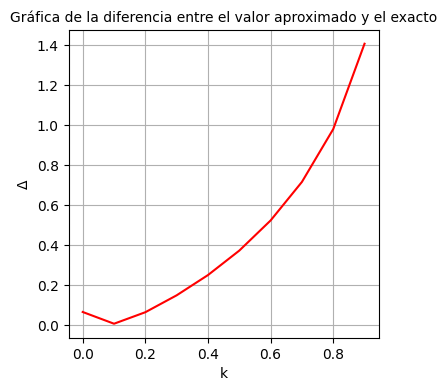

In [299]:
#Debido a la diferencia a medida que aumenta 
Delta=np.array([abs(E(m_val[i])-IntElip(m_val[i]))for i in range(len(k_val))])

plt.figure(figsize=(4,4))
plt.title('Gráfica de la diferencia entre el valor aproximado y el exacto',size=10)
plt.plot(k_val,Delta,color='red')
plt.xlabel('k')
plt.ylabel('Δ')
plt.grid()

In [300]:
#A medida que k se acerca a 1 el error aumenta ,ya que el valor se aleja del esperado por el método de scipy

# a) Aφ(r = 1.1, θ) vs. θ

In [301]:
#DATOS 
a=1
I=3
θ=np.linspace(0.2,np.pi/1.10,100)  
r=np.array(1.1)

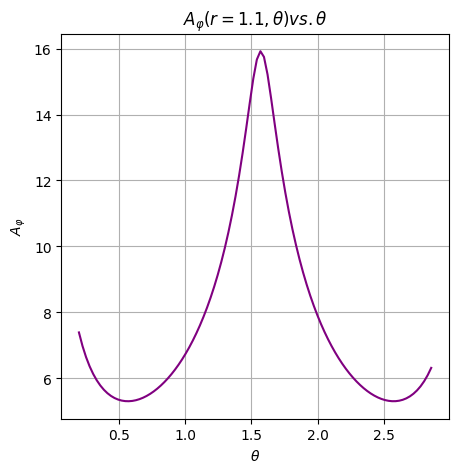

In [302]:
#Definir una funcion para Aφ
def A_phi(θ,r):
  #μ0∕4π = 1
  k=np.sqrt((4*a*r*np.sin(θ))/(a**2+r**2+2*a*r*np.sin(θ)))
  t1=(4*I*a)/(np.sqrt(a**2+r**2+2*a*r*np.sin(θ)))
  t2=((2-k**2)*IntElip(k)-2*E(k))/(k**2)
  return t1*t2

#Gráfica
A=np.array([A_phi(theta,r) for theta in θ])
plt.figure(figsize=(5,5))
plt.plot(θ,A,color='purple')
plt.xlabel('$\\theta$')
plt.ylabel('$A_{φ}$')
plt.title('$A_{φ}(r = 1.1, θ) vs. θ$')
plt.grid()

Hay cierto comportamiento extraño en los extremos ,opté por pensar que era debido al valor de las integrales elípticas y las encontré por diferentes métodos ,como ellipk y ellipe ,sin embargo aún tengo ese problema.
También cuando θ E [0,2Π] la $A_{Φ}$ se comporta extraño .

# b) Aφ(r, θ = π∕3) vs. r

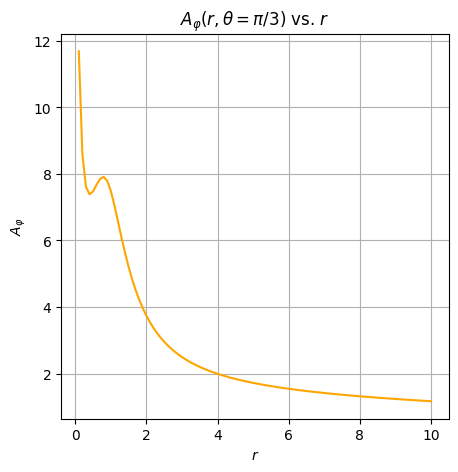

In [303]:
# DATOS
a = 1
I = 3
θ = np.pi/3 # ángulo fijo
r = np.linspace(0.1, 10, 100) # rango de r
A=np.array([A_phi(θ,i) for i in r])

# Gráfica
plt.figure(figsize=(5,5))
plt.plot(r, A, color='orange')
plt.xlabel('$r$')
plt.ylabel('$A_{φ}$')
plt.title('$A_{φ}(r, θ = π/3)$ vs. $r$')
plt.grid()
plt.show()

**Realizar hasta aquí**


7 Write a double precision program to integrate an arbitrary function numerically using the trapezoid rule, the Simpson rule, and Gaussian quadrature. For our assumed problems there is an analytics answer:

\begin{equation}
\frac{\mathrm{d}N(t)}{\mathrm{d}t}=e^{-t}
\end{equation}

\begin{equation}
N(1)=\int_0^{1}e^{-t} dt=1-e^{-1}
\end{equation}

7.2. Compute the relative error $\epsilon=|numerical-exact|/exact$ in each case. Present your data in the tabular form 
with space or tabas seprating the field. Try N values of 2, 10, 20 , 40 , 80, 160

| N  |$\epsilon_T$ | $\epsilon_S$ | $\epsilon_G$ |
|----|---------------|--------------|--------------|
|   2  |...|...|...|
|   10  |...|...|...|

7.3. Make a log-log plot of relative errore versus. You should observe that 
$\epsilon\approx CN^{\alpha}$, $\mathrm{log} \epsilon =\alpha \mathrm{log}N + \mathrm{constant}$. This mean that a power-law dependence appears as a straight line on a log-log plot, and that if you use $\log_{10}$, the the ordinate on your log-log plot will be the negative of the numver of decimal places of presicion in your calculation.
7.4. Use your plot or table to stimate the power-law dependence of the error $\epsilon$ on the number of points N and to determine the number of decimal places of presicion in your calculation. Do this for both the trapezoid and simpsons rules and for both the algolrithmic and round-off error regimes. (Note that if may be hard to reach the round-off error regime for the trapezoid rule becasue the aproximation ) error is so large